In [3]:
%matplotlib inline
import numpy as np
import matplotlib 
import matplotlib.pyplot as plt

In [4]:
def sci(x):
    if (np.ceil(np.log10(x)) == 1):
        return round(x,2)
    elif (np.ceil(np.log10(x)) == 2):
        return round(x,1)
    else:
        return ("{:0.2e}".format(x))

def sci_s(x):
    return str(sci(x))

In [5]:
def afficheHisto_1data(string):     #Prend en argument 1 liste de scores
    data = np.loadtxt(string, delimiter = ' ')
    N = np.shape(data[:,0])[0]
    gagnant = data[:,2]
    labels, counts = np.unique(gagnant, return_counts=True)
    plt.bar(labels, counts, align='center', color = "orange")
    #plt.hist(gagnant, color="orange", bins=3)
    plt.xticks([0, 1, 2],["Egalité", "Blanc", "Noir"])
    plt.title("Nombre de parties gagnées")   #add sur cb de parties ?
    print("Nombre d'égalité, de victoires de blanc, de victoires de noir : ", counts)
    print("Pourcentage d'égalité, de victoires de blanc, de victoires de noir : ", counts/N*100)
    dx = 0.3
    plt.text(0-dx,1/2*counts[0], str(counts[0]) + ' (' + str(round(counts[0]/N*100,2)) + '%)')
    plt.text(1-dx,1/2*counts[1], str(counts[1]) + ' (' + str(round(counts[1]/N*100,2)) + '%)')
    plt.text(2-dx,1/2*counts[2], str(counts[2]) + ' (' + str(round(counts[2]/N*100,2)) + '%)')
    plt.axhline(y = (N-counts[0])/2, xmin=0, xmax=3, c="darkred", linestyle="dashed") 

In [6]:
def afficheHisto_moy(moy, std, str_jA, str_jB, N):    #Prend en argument une moyenne de scores
    plt.bar([0, 1, 2], moy, align='center', color = "orange")
    plt.xticks([0, 1, 2],["Egalité", str_jA, str_jB])
    plt.title("Nombre de parties gagnées")   #add sur cb de parties ?
    #print("Nombre d'égalité, de victoires de blanc, de victoires de Noir en moyenne: ", moy)
    dx = 0.3
    plt.text(0-dx,1/2*moy[0], str(round(moy[0],1)) + ' (' + str(round(moy[0]/N*100,1)) + '%)')
    plt.text(1-dx,1/2*moy[1], str(round(moy[1],1)) + ' (' + str(round(moy[1]/N*100,1)) + '%)')
    plt.text(2-dx,1/2*moy[2], str(round(moy[2],1)) + ' (' + str(round(moy[2]/N*100,1)) + '%)')
    for i in range(3):
        plt.axhline(y = moy[i]+std[i], xmin=i*(1/3)+0.04, xmax=(i+1)*(1/3)-0.04, c="grey", linestyle="dashed")
        plt.axhline(y = moy[i]-std[i], xmin=i*(1/3)+0.04, xmax=(i+1)*(1/3)-0.04, c="grey", linestyle="dashed")
    plt.axhline(y = (N-moy[0])/2, xmin=0, xmax=3, c="darkred", linestyle="dashed", label="$N_{jA}^{vict} = N_{jB}^{vict}$")
    plt.legend()
    
def stats(string):   #Moyenne sur 100 sets de 1000 data
    data = np.loadtxt(string, delimiter = ' ')
    nbVict = np.zeros((100,3))    #nbVictoires, dim 100
    for i in range(100):
        gagnant = data[i*1000 : (i+1)*1000, 2]
        nbVict[i][0] = np.sum(gagnant == 0)
        nbVict[i][1] = np.sum(gagnant == 1)
        nbVict[i][2] = np.sum(gagnant == 2)
    afficheHisto_moy(np.mean(nbVict, axis=0), np.std(nbVict, axis=0), "Blanc", "Noir", 1000)
    
def stats_50(string, str_jA, str_jB):   #Moyenne sur 100 sets de 1000 data, qd 50% blanc - 50% noir
    data = np.loadtxt(string, delimiter = ' ')
    nbVict = np.zeros((100,3))    #nbVictoires, dim 100
    for i in range(100):
        gagnant = data[i*1000 : (i+1)*1000, 2]
        nbVict[i][0] = np.sum(gagnant == 0)
        nbVict[i][1] = np.sum(gagnant[:500] == 1)      #Vict de joueur A (est blanc sur 500 premiers puis noir sur les 500 suivants)
        nbVict[i][2] = np.sum(gagnant[:500] == 2)      #Vict de joueur B
        nbVict[i][1] += np.sum(gagnant[500:] == 2)      #Vict de joueur A 
        nbVict[i][2] += np.sum(gagnant[500:] == 1)      #Vict de joueur B
    afficheHisto_moy(np.mean(nbVict, axis=0), np.std(nbVict, axis=0), str_jA, str_jB, 1000)

In [50]:
from scipy.optimize import curve_fit

def model(x, a, sigma, mu):
    return a * (1/(sigma*np.sqrt(2*np.pi))) * np.exp(- (x-mu)*(x-mu)/(2*sigma*sigma))

def gaussienne(string, str_jA):      #affiche la distrib gaussienne du score de blanc 
    data = np.loadtxt(string, delimiter = ' ')   #[scoreB, scoreN, gagnant]
    N = np.shape(data[:,0])[0]
    scorejA = data[:,0]
    labels, counts = np.unique(scorejA, return_counts=True)
    #print(labels, counts)
    xdata = labels
    ydata = counts
    popt, pcov = curve_fit(model, xdata, ydata, p0 = (1,1,30))  #popt renvoie les paramètres optimisés
    x = np.linspace(np.min(labels),np.max(labels),1000)
    plt.scatter(xdata,ydata, s=1)
    plt.plot(x, model(x, *popt), c="orange", label = r"y = $a\frac{1}{\sigma \sqrt{2\pi}}e^{-\frac{(x-\mu)^2}{2\sigma^2}}$")
    plt.xlabel("Score de " + str_jA)
    plt.ylabel("Nombre de parties")
    plt.title(r"(a,$\sigma,\mu$) = (" + sci_s(popt[0]) + ', ' + sci_s(popt[1]) + ', ' + sci_s(popt[2]) + ')')
    ytext = np.max(ydata) - N/200
    #plt.text(5, ytext, r"y = $a\frac{1}{\sigma \sqrt{2\pi}}e^{-\frac{(x-\mu)^2}{2\sigma^2}}$")
    #plt.text(38, ytext, r"(a,$\sigma,\mu$) = (" + sci_s(popt[0]) + ', ' + sci_s(popt[1]) + ', ' + sci_s(popt[2]) + ')', size=8)
    plt.legend()

In [49]:
def plot(string, label):                         #affiche le plot (pour minmax surtout)
    data = np.loadtxt(string, delimiter = ' ')   #[scorejA, scorejB, gagnant]
    N = np.shape(data[:,0])[0]
    scorejA = data[:,0]
    labels, counts = np.unique(scorejA, return_counts=True)
    #print(labels, counts)
    xdata = labels
    ydata = counts
    plt.plot(xdata,ydata, label = label)
    plt.xlabel("Score de MinMax face à Aléatoire")
    plt.ylabel("Nombre de parties")
    plt.legend() 

In [46]:
def histo_groupe():
    N = 5 ; M = 1000
    moy = np.zeros((N,3))
    std = np.zeros((N,3))
    moy[0], std[0] = moy_std("data/alea_jAVSjB_2.dat")
    moy[1], std[1] = moy_std("data/retourneMax.dat")
    moy[2], std[2] = moy_std("data/MinMax_prof1.dat")
    moy[3], std[3] = moy_std("data/MinMax_prof2.dat")
    moy[4], std[4] = moy_std("data/MinMax_prof3.dat")
    strjA = ["Aléatoire", "RetourneMax", "MinMax prof1", "MinMax prof2", "MinMax prof3"]
    colors = ['#EDF8B1', '#C7E9B4', '#7FCDBB', '#41B6C4', '#1D91C0', '#225EA8']
    
    dx = 0.2 ; dy = 50
    for j in range(N):
        plt.bar([0+4*j, 1+4*j, 2+4*j], moy[j], align='center', label = strjA[j], color=colors[j])
        #print("Nombre d'égalité, de victoires de blanc, de victoires de Noir en moyenne: ", moy)
        plt.text(0+4*j-dx,0*moy[j][0]+dy, str(round(moy[j][0],1)) + ' (' + str(round(moy[j][0]/M*100,1)) + '%)', rotation=90)
        plt.text(1+4*j-dx,0*moy[j][1]+dy, str(round(moy[j][1],1)) + ' (' + str(round(moy[j][1]/M*100,1)) + '%)', rotation=90)
        plt.text(2+4*j-dx,0*moy[j][2]+dy, str(round(moy[j][2],1)) + ' (' + str(round(moy[j][2]/M*100,1)) + '%)', rotation=90)
        #for i in range(3):
            #plt.axhline(y = moy[i]+std[i], xmin=i*(1/3)+0.04, xmax=(i+1)*(1/3)-0.04, c="grey", linestyle="dashed")
            #plt.axhline(y = moy[i]-std[i], xmin=i*(1/3)+0.04, xmax=(i+1)*(1/3)-0.04, c="grey", linestyle="dashed")
        #plt.axhline(y = (N-moy[0])/2, xmin=0, xmax=3, c="darkred", linestyle="dashed", label="$N_{jA}^{vict} = N_{jB}^{vict}$")
        
    
    plt.xticks([0,1,2,4,5,6,8,9,10,12,13,14,16,17,18],["Egalité", strjA[0], "Aléatoire", "Egalité", strjA[1], "Aléatoire", "Egalité", strjA[2], "Aléatoire", "Egalité", strjA[3], "Aléatoire", "Egalité", strjA[4], "Aléatoire"], rotation=90)
    plt.title("Nombre de parties gagnées (pour 10 000 parties)")   #add sur cb de parties ?
    plt.legend(fontsize='small')
    plt.ylim(0,900)
    
def moy_std(string):   #Moyenne sur 100 sets de 1000 data, qd 50% blanc - 50% noir
    data = np.loadtxt(string, delimiter = ' ')
    nbVict = np.zeros((100,3))    #nbVictoires, dim 100
    for i in range(100):
        gagnant = data[i*1000 : (i+1)*1000, 2]
        nbVict[i][0] = np.sum(gagnant == 0)
        nbVict[i][1] = np.sum(gagnant[:500] == 1)     
        nbVict[i][2] = np.sum(gagnant[:500] == 2)      
        nbVict[i][1] += np.sum(gagnant[500:] == 2)      
        nbVict[i][2] += np.sum(gagnant[500:] == 1)      
    return(np.mean(nbVict, axis=0), np.std(nbVict, axis=0))     #Renvoie 2 tableaux de dim (1,3)

## Comparaison des algorithmes

### 1) Aléatoire VS Aléatoire

#### 1.1) Noir VS blanc

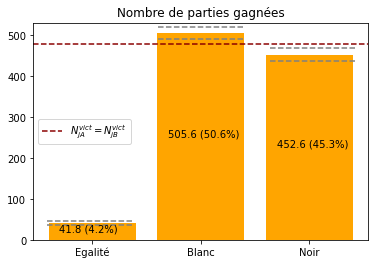

In [10]:
#os.system(myCmd1)
#os.system(myCmd2)

stats("data/alea_noirVSblanc.dat")
#plt.savefig("Graphs2/Histo_alea_noirVSblanc.svg", format = 'svg')

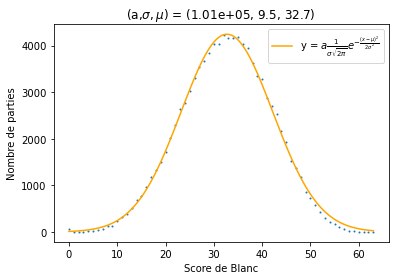

In [51]:
gaussienne("data/alea_noirVSblanc.dat", "Blanc")
#plt.savefig("Graphs2/Gaussienne_alea_noirVSblanc.svg", format = 'svg')

#### 1.2) Joueur 1 VS joueur 2 (noir 50%, blanc 50%)

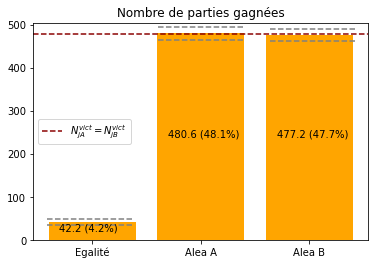

In [12]:
stats_50("data/alea_jAVSjB_2.dat", "Alea A", "Alea B")
#plt.savefig("Graphs2/Histo_alea_jAVSjB.svg", format = 'svg')

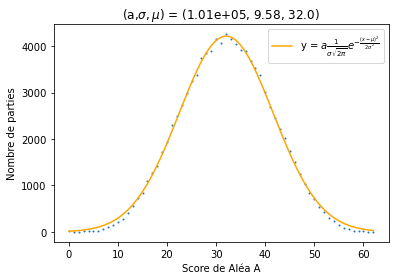

In [52]:
gaussienne("data/alea_jAVSjB_2.dat", "Aléa A")
#plt.savefig("Graphs2/Gaussienne_alea_jAVSjB.svg", format = 'svg')

### 2) RetourneMax VS Aléatoire

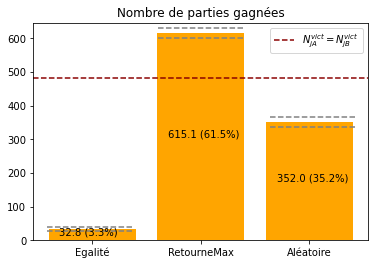

In [14]:
stats_50("data/retourneMax.dat", "RetourneMax", "Aléatoire")
#plt.savefig("Graphs2/Histo_retourneMax.svg", format = 'svg')

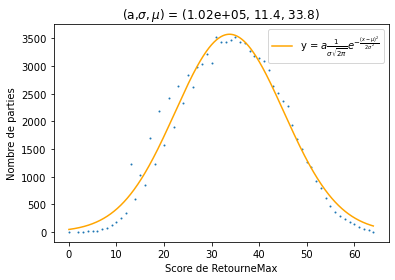

In [53]:
gaussienne("data/retourneMax.dat", "RetourneMax")
#plt.savefig("Graphs2/Gaussienne_retourneMax.svg", format = 'svg')

### 3) MinMax VS Aléatoire

#### 3.1) Prof 1

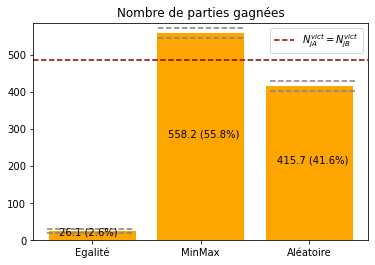

In [16]:
stats_50("data/MinMax_prof1.dat", "MinMax", "Aléatoire")
#plt.savefig("Graphs2/Histo_MinMax_prof1.svg", format = 'svg')

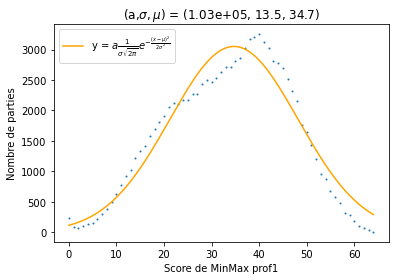

In [54]:
gaussienne("data/MinMax_prof1.dat", "MinMax prof1")
#plt.savefig("Graphs2/Gaussienne_MinMax_prof1.svg", format = 'svg')

#### 3.2) Prof 2

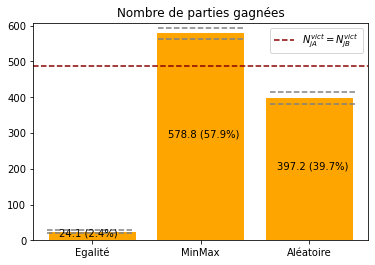

In [19]:
stats_50("data/MinMax_prof2.dat", "MinMax", "Aléatoire")
#plt.savefig("Graphs2/Histo_MinMax_prof2.svg", format = 'svg')

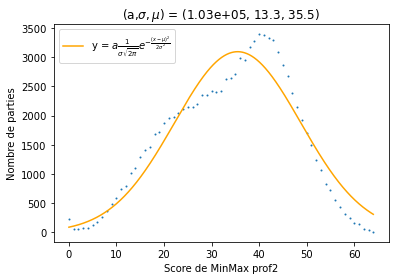

In [55]:
gaussienne("data/MinMax_prof2.dat", "MinMax prof2")
#plt.savefig("Graphs2/Gaussienne_MinMax_prof2.svg", format = 'svg')

#### 3.3) Prof 3

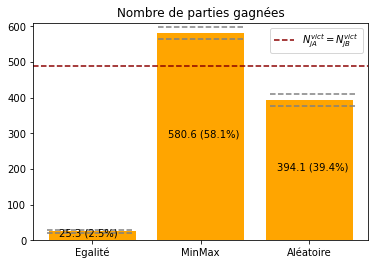

In [21]:
stats_50("data/MinMax_prof3.dat", "MinMax", "Aléatoire")
#plt.savefig("Graphs2/Histo_MinMax_prof3.svg", format = 'svg')

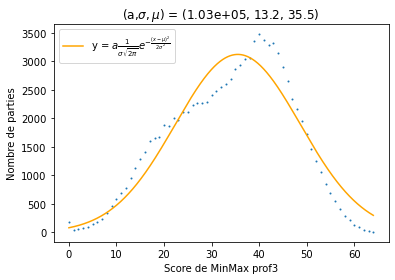

In [56]:
gaussienne("data/MinMax_prof3.dat", "MinMax prof3")
#plt.savefig("Graphs2/Gaussienne_MinMax_prof3.svg", format = 'svg')

### 4) Regroupement de plot

#### 4.1) Plot

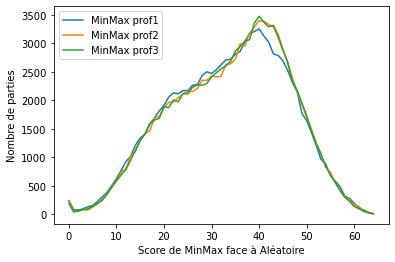

In [57]:
#plot("data/retourneMax.dat", "RetourneMax")
plot("data/MinMax_prof1.dat", "MinMax prof1")
plot("data/MinMax_prof2.dat", "MinMax prof2")
plot("data/MinMax_prof3.dat", "MinMax prof3")
#plt.savefig("Graphs2/Superposition_MinMax_1-3.svg", format = 'svg')

#### 4.2) Histo

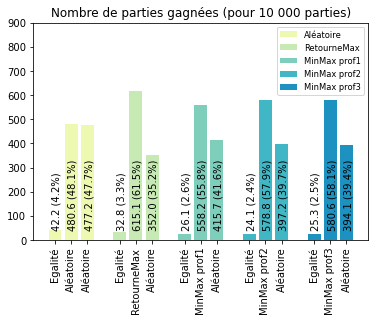

In [48]:
histo_groupe()
#plt.tight_layout()
#plt.savefig("Graphs2/Superposition_histo.svg", format = 'svg')